##Credit Card Fraud Detection using Anomaly Detection Project

##Done By: Ashwath Bala S

Table of Contents: -

1. Problem Statement
2. Data Description
3. Importing the Required Libraries
4. Loading the Dataset
5. Missing Value Treatment
6. Exploratory Data Analysis
7. Feature Pre-Processing
8. Model Building
9. Model Evaluation
10. Model Comparison

#1. Problem Statement

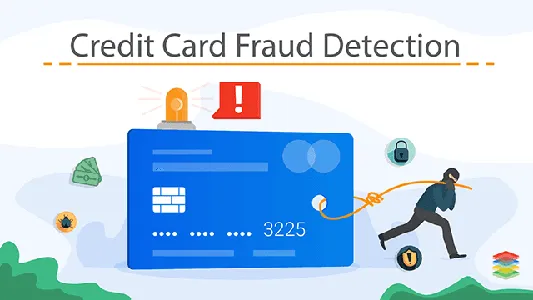

The objective of this project is to develop an anomaly detection model that accurately identifies fraudulent credit card transactions based on historical transaction data. Utilizing machine learning algorithms, the model will analyze patterns in transaction behavior to distinguish between legitimate and suspicious activities

##2. Dataset Description

The dataset has 2,84,807 records and has the following variables:

Time: Time elapsed since the first transaction in seconds.

V1 to V28: Anonymized features derived from the original data (these could represent various transaction attributes).

Amount: The transaction amount.

Class: Indicating whether the transaction is fraudulent (1) or legitimate (0) [Target Variable]

##3. Importing the Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
from pyod.models.iforest import IForest
from pyod.models.lof import LOF
from pyod.models.ocsvm import OCSVM
from xgboost import XGBClassifier
from pyod.utils import evaluate_print
from pyod.utils.example import visualize
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

##4. Loading the Dataset

In [ ]:
data=pd.read_csv("creditcard.csv")

In [ ]:
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
data.shape

(284807, 31)

In our dataset, we have 2,84,807 rows and 31 columns

##5. Missing Value Treatment

In [ ]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In this dataset, we are not having any Null Values

##6. Exploratory Data Analysis

In [ ]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [ ]:
# Let's us assign an Outlier Fraction Value:

outlier_fraction = len(data[data['Class'] == 1]) / len(data[data['Class'] == 0])

In [ ]:
print(outlier_fraction)

0.0017304750013189597


In [ ]:
# determining number of fraud cases in our dataset
data.Class.value_counts(normalize=True)

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

In [ ]:
Valid = data[data['Class']==0]
Fraud = data[data['Class']==1]

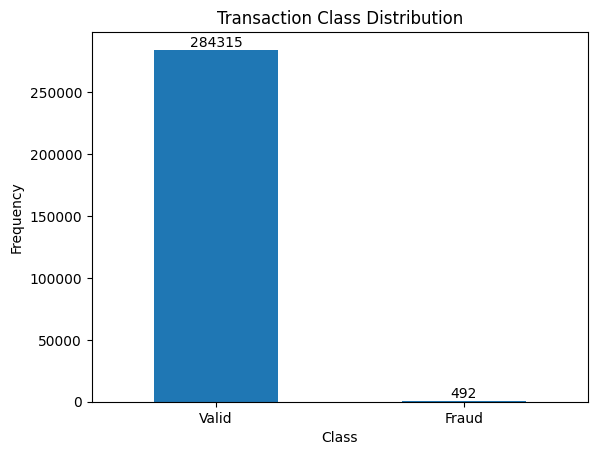

In [ ]:
# Let us determine the number of fraud and valid transactions in our entire dataset

LABELS = ["Valid", "Fraud"]

# Counting the occurrences of each class
count_classes = pd.concat([Valid['Class'].value_counts(), Fraud['Class'].value_counts()]).sort_index()

# Plotting the distribution
ax = count_classes.plot(kind='bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

# Annotating each bar with its count
for i, v in enumerate(count_classes):
    ax.text(i, v + 50, str(v), ha='center', va='bottom', fontsize=10, color='black')

plt.show()

There are 284,315 normal transactions and 492 fraud transactions. The fraud cases are only 0.172 % from all transactions. We have a very unbalanced dataset and it is a typical in fraud and anomaly detection.

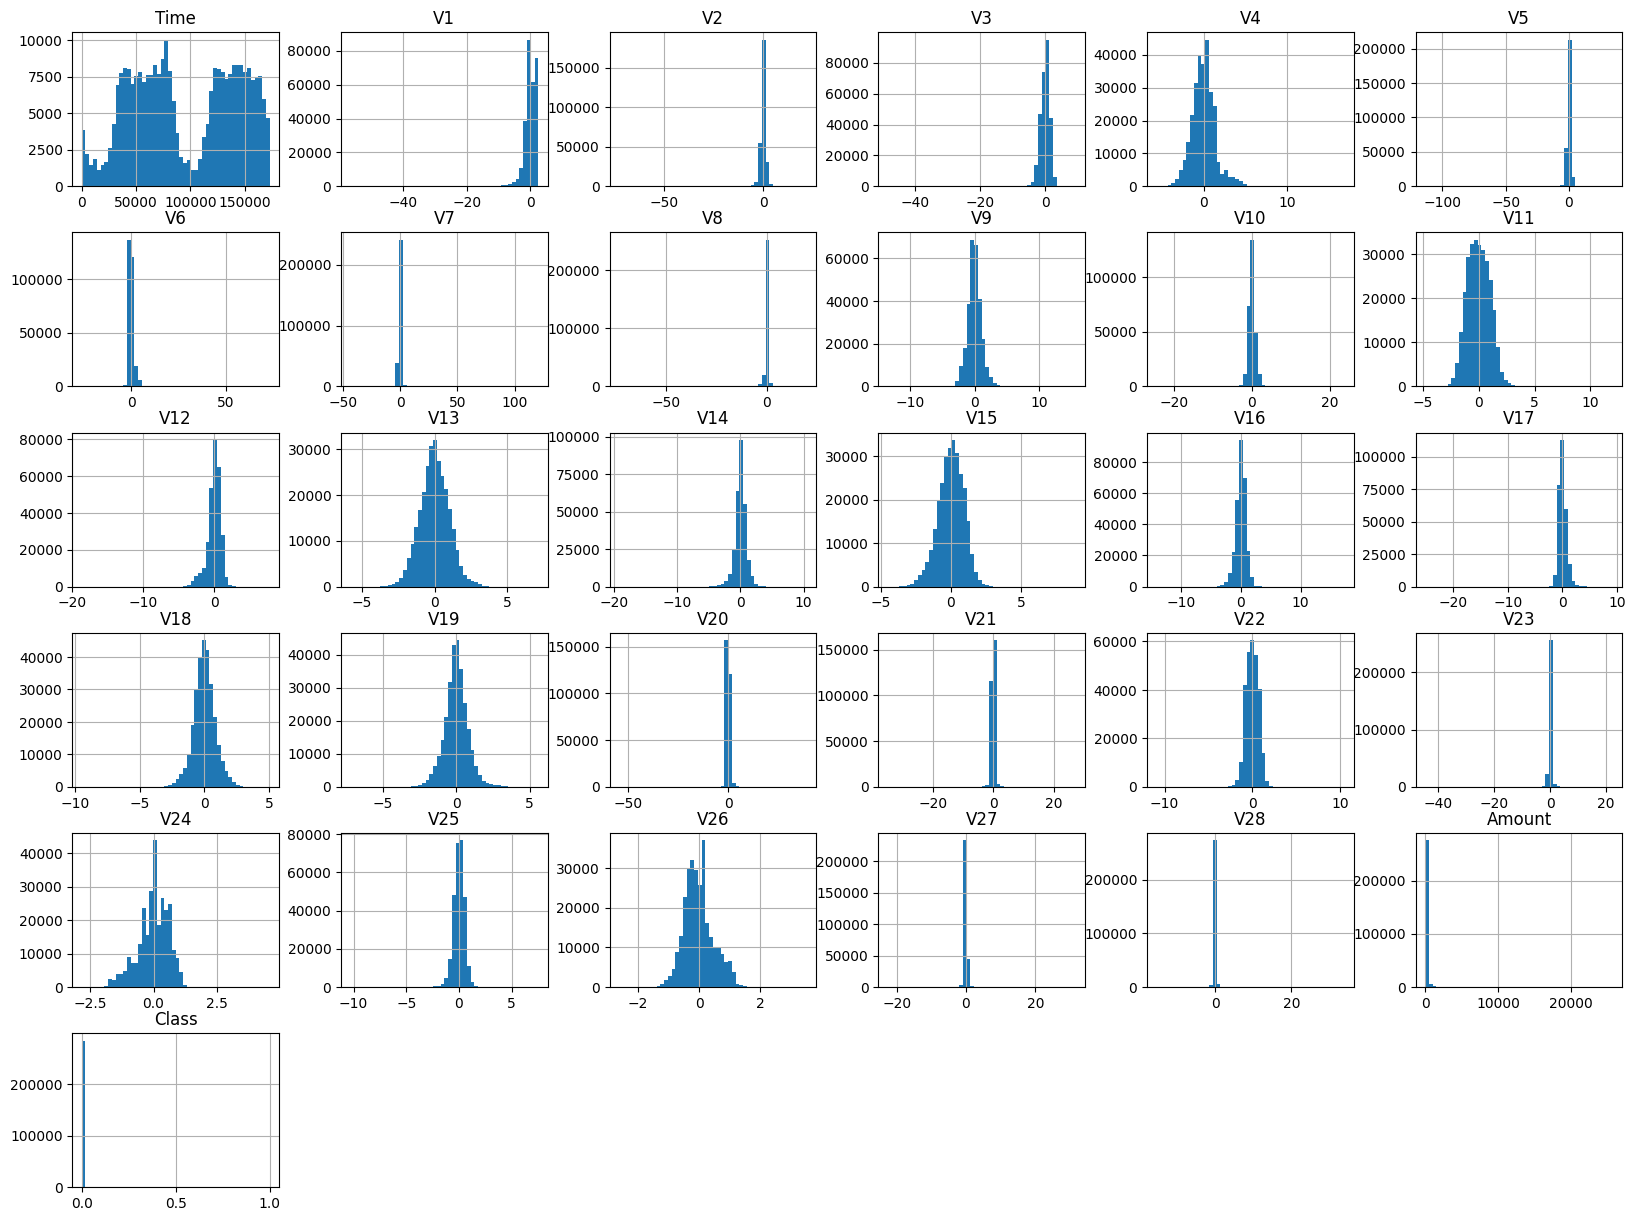

In [ ]:
data.hist(figsize=(20, 15), bins=50);

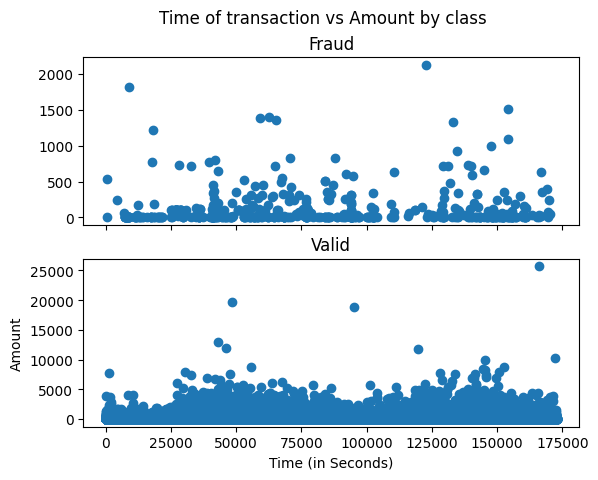

In [ ]:
# Scatter Plot for fraudulent transactions occur more often during certain time frame

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(Fraud.Time, Fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(Valid.Time, Valid.Amount)
ax2.set_title('Valid')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show();

Transaction Time is in Seconds

In [ ]:
data['Time'] = data['Time'].apply(lambda x : x / 3600)

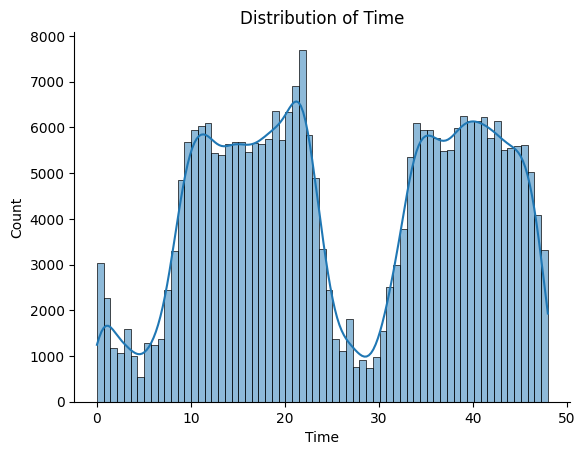

In [ ]:
sns.histplot(data['Time'], kde=True)
plt.title("Distribution of Time")
sns.despine()
plt.show()

Analysis of the Transaction Amount Data

In [ ]:
data_valid = data[data['Class']==0]
data_fraud = data[data['Class']==1]

In [ ]:
print(data_valid.Amount.describe())
print(data_fraud.Amount.describe())

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


From above counts we can see that the mean is a little higher in the fraud transactions but it is certainly within a standard deviation. Thus it is unlikely to be easy to discriminate in a highly precise manner between the classes with pure statistical methods.

Transaction by Amount Data

The most of the transactions in this data were of small amounts and will be generally uninteresting in analysis. Thus we are looking at transactions which are above 100$. The plot of high value transactions:

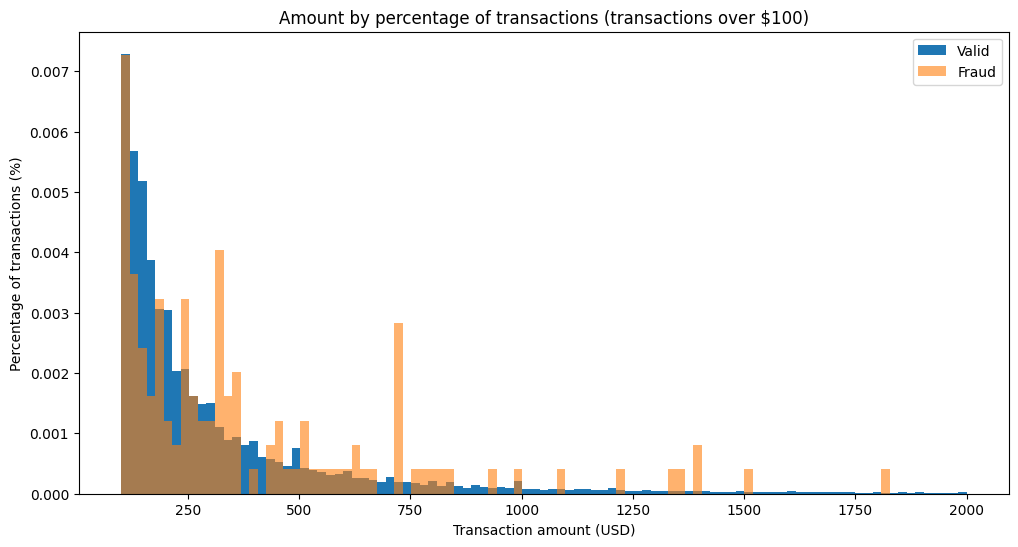

In [ ]:
bins = np.linspace(100, 2000, 100)
plt.figure(figsize=(12, 6))
plt.hist(data_valid.Amount, bins, alpha=1, density=True, label='Valid')
plt.hist(data_fraud.Amount, bins, alpha=0.6, density=True, label='Fraud')
plt.legend(loc='upper right')
plt.title("Amount by percentage of transactions (transactions over \$100)")
plt.xlabel("Transaction amount (USD)")
plt.ylabel("Percentage of transactions (%)");
plt.show()

Since the fraud cases are relatively few in number compared to valid data, we see the data look predictably more variable. Probably we are likely observing only a single fraud transaction. It would be hard to differentiate fraud from normal transactions by transaction amount alone.

Transaction by Hour

The plot of transaction time by hour (for 48 hours):

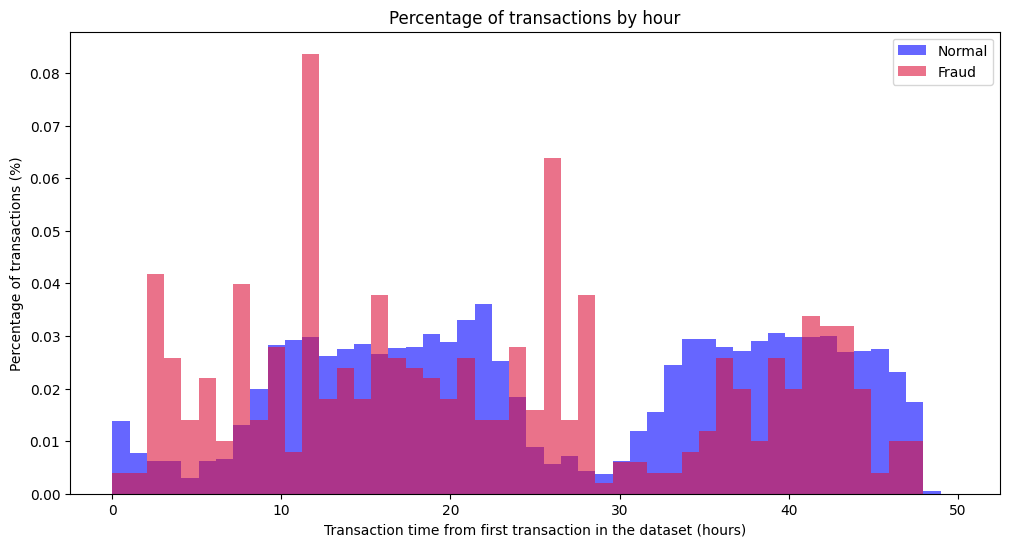

In [ ]:
bins = np.linspace(0, 50, 50)
plt.figure(figsize=(12, 6))
plt.hist(data_valid.Time, bins, alpha=0.6, density=True, label='Normal', color='blue')
plt.hist(data_fraud.Time, bins, alpha=0.6, density=True, label='Fraud', color='crimson')
plt.legend(loc='upper right')
plt.title("Percentage of transactions by hour")
plt.xlabel("Transaction time from first transaction in the dataset (hours)")
plt.ylabel("Percentage of transactions (%)");
plt.show()

The hour "zero" corresponds to the hour when the first transaction happened.

Distributions of normal and fraud transactions are not shows significant differences thus based on only transaction time we will not build a good precise classifier.

Exploration of Transaction Amount vs. Hour

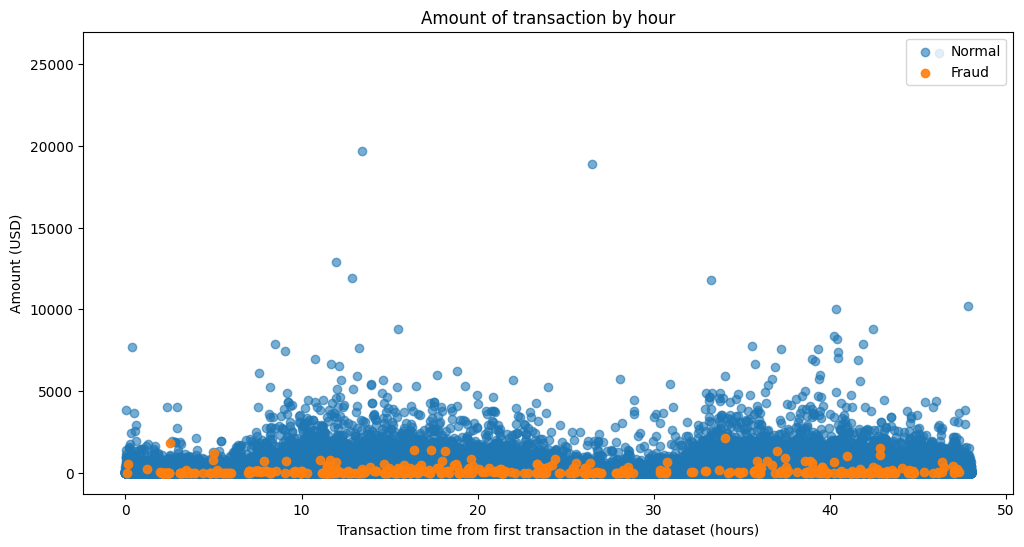

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(data_valid.Time, data_valid.Amount, alpha=0.6, label='Normal')
plt.scatter(data_fraud.Time, data_fraud.Amount, alpha=0.9, label='Fraud')
plt.title("Amount of transaction by hour")
plt.xlabel("Transaction time from first transaction in the dataset (hours)")
plt.ylabel('Amount (USD)')
plt.legend(loc='upper right')
plt.show()

In this case this is not enough to make a good classifier. It would be hard to draw a line that cleanly separates fraud and normal transactions.

Correlation Heatmap

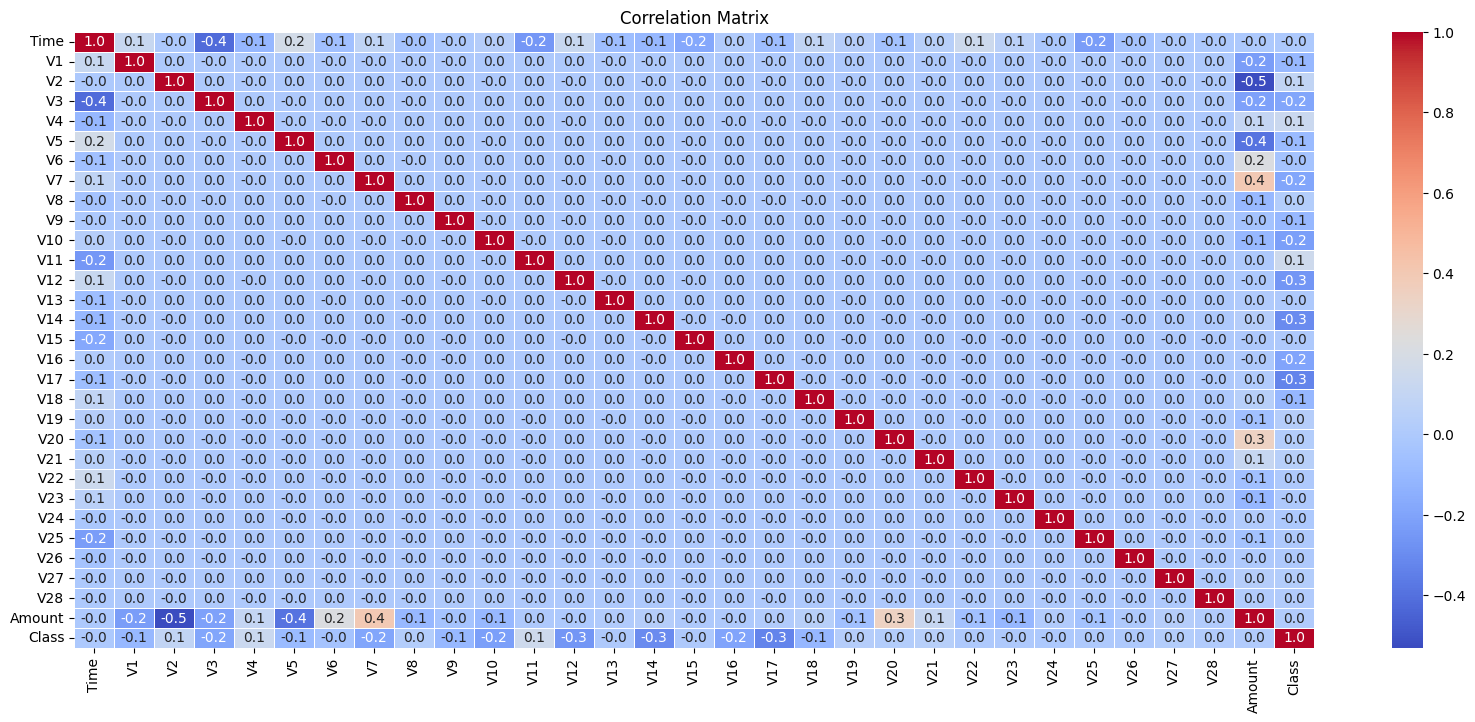

In [ ]:
corr = data.corr()

plt.figure(figsize=(20,8))
ax = sns.heatmap(corr.round(2), annot = True, linewidth=0.5, fmt='0.1f', cmap = 'coolwarm')
ax.set_ylim(sorted(ax.get_xlim(), reverse=True))
ax.set(title="Correlation Matrix");
plt.show()

Conclusion from Correlation Matrix:

(i) None of the V1 to V28 PCA components have any correlation to each other

(ii) Class has some form positive and negative correlations with the V components

(iii) Class has no correlation with Time and Amount.

As Anomalies are Rare and Distinct, It is good for us to continue with Anomaly Detection in our Project

##7. Feature Pre-Processing

In [ ]:
# Scaling the Amount column
data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

# Scaling the Time column
data['Time'] = StandardScaler().fit_transform(data['Time'].values.reshape(-1, 1))

In [ ]:
# Checking the first few rows of the dataset after scaling
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


## 8. Model Building

In [ ]:
# Defining X and y
X = data.drop('Class', axis=1)
y = data['Class']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print(f'X_train shape: {X_train.shape};')
print(f'X_test shape: {X_test.shape}; y_test shape: {y_test.shape}')

X_train shape: (199364, 30);
X_test shape: (85443, 30); y_test shape: (85443,)


(i) Isolation Forest Model

In [ ]:
# Initializing the Isolation Forest model
model_iF = IForest(n_estimators=50,
                 max_samples='auto',
                 max_features=1,
                 contamination=outlier_fraction,
                 random_state=42)

# Fitting the model on training data
model_iF.fit(X_train)

IForest(behaviour='old', bootstrap=False, contamination=0.0017304750013189597,
    max_features=1, max_samples='auto', n_estimators=50, n_jobs=1,
    random_state=42, verbose=0)

(ii) Local Outlier Factor Model

In [ ]:
# Initializing the LOF model
model_lof = LOF(n_neighbors=150,
                contamination=outlier_fraction)


# Fitting the model on training data
model_lof.fit(X_train)

LOF(algorithm='auto', contamination=0.0017304750013189597, leaf_size=30,
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=150,
  novelty=True, p=2)

(iii) One-Class SVM Model

In [ ]:
# Initializing the OC-SVM model
model_ocsvm = OCSVM(kernel='rbf',
                    nu=0.1,
                    gamma=0.01,
                    tol=1e-4,
                    shrinking=True)

# Fitting the model on training data
model_ocsvm.fit(X_train)

OCSVM(cache_size=200, coef0=0.0, contamination=0.1, degree=3, gamma=0.01,
   kernel='rbf', max_iter=-1, nu=0.1, shrinking=True, tol=0.0001,
   verbose=False)

(iv) XGBoost Model

In [ ]:
# Initializing the XGBoost model
model_xgb = XGBClassifier(
    objective='binary:logistic',
    n_estimators=50,
    max_depth=3,
    eval_metric='auc',
    random_state=42
)

# Fitting the XGBoost Model
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

##9. Model Evaluation

(i) Isolation Forest Model

In [ ]:
# Getting the prediction labels of the training data
y_train_pred_iF = model_iF.labels_    # binary labels (0: inliers, 1: outliers)

# Outlier scores
y_train_scores_iF = model_iF.decision_scores_   # raw outlier scores

In [ ]:
# Evaluating on the training data
evaluate_print('Isolation Forest', y_train, y_train_scores_iF)

Isolation Forest ROC:0.9364, precision @ rank n:0.2669


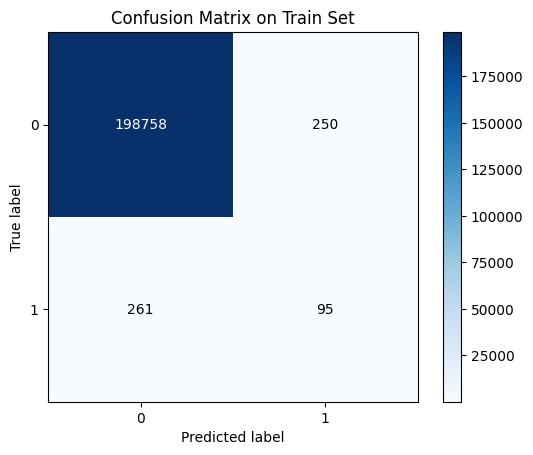

In [ ]:
# Plotting the confusion matrix in the train set

skplt.metrics.plot_confusion_matrix(y_train, y_train_pred_iF, normalize=False, title="Confusion Matrix on Train Set")
plt.show()

Evaluation on Test Data

In [ ]:
# Getting outlier scores for test data
y_test_scores_iF = model_iF.decision_function(X_test)   # outlier scores

# Evaluating on the test data
evaluate_print('Isolation Forest', y_test, y_test_scores_iF)

Isolation Forest ROC:0.9493, precision @ rank n:0.3382


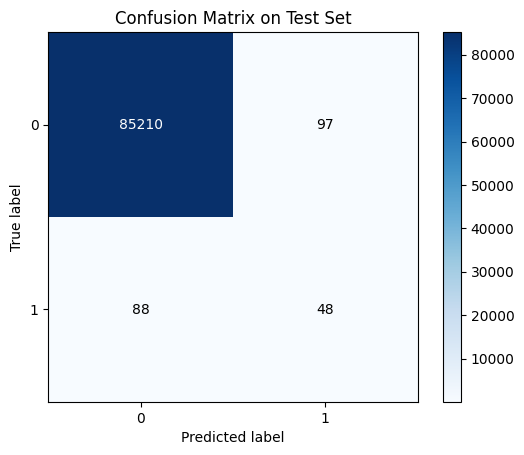

In [ ]:
# Predictions on Test Data
y_preds_iF= model_iF.predict(X_test)  # outlier labels (0 or 1)

# Plotting the confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_preds_iF, normalize=False, title="Confusion Matrix on Test Set")
plt.show()

(ii) Local Outlier Factor Model

In [ ]:
# Getting the prediction labels of the training data
y_train_pred_lof = model_lof.labels_

# Outlier scores
y_train_scores_lof = model_lof.decision_scores_

In [ ]:
# Evaluating on the training data
evaluate_print('Local Outlier Factor', y_train, y_train_scores_lof)

Local Outlier Factor ROC:0.7623, precision @ rank n:0.0365


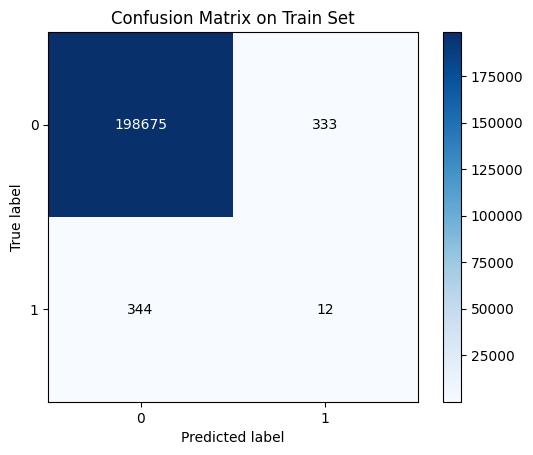

In [ ]:
# Plotting the confusion matrix on the train set
skplt.metrics.plot_confusion_matrix(y_train, y_train_pred_lof, normalize=False, title="Confusion Matrix on Train Set")
plt.show()

Evaluation on Test Data

In [ ]:
# Getting outlier scores for test data
y_test_scores_lof = model_lof.decision_function(X_test)

# Evaluating on the test data
evaluate_print('Local Outlier Factor', y_test, y_test_scores_lof)

Local Outlier Factor ROC:0.7921, precision @ rank n:0.1029


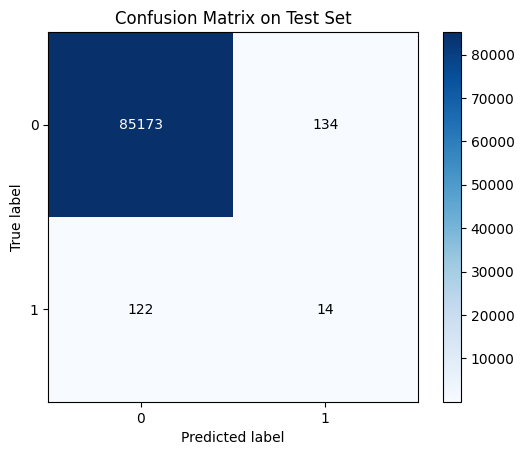

In [ ]:
# Plotting the confusion matrix on the test set
y_preds_lof = model_lof.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, y_preds_lof, normalize=False, title="Confusion Matrix on Test Set")
plt.show()

(iii) One-Class SVM

In [ ]:
# Getting the prediction labels of the training data
y_train_pred_ocsvm = model_ocsvm.labels_

# Outlier scores
y_train_scores_ocsvm = model_ocsvm.decision_scores_

In [ ]:
# Evaluating on the training data
evaluate_print('One-Class SVM', y_train, y_train_scores_ocsvm)

One-Class SVM ROC:0.942, precision @ rank n:0.2107


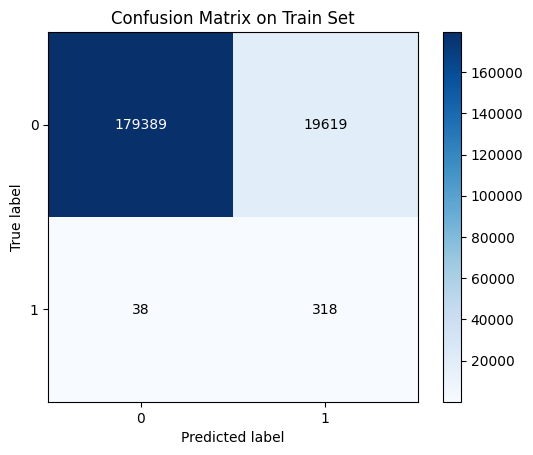

In [ ]:
# Plotting the confusion matrix on the train set
skplt.metrics.plot_confusion_matrix(y_train, y_train_pred_ocsvm, normalize=False, title="Confusion Matrix on Train Set")
plt.show()

Evaluation on Test Data

In [ ]:
# Getting outlier scores for test data
y_test_scores_ocsvm = model_ocsvm.decision_function(X_test)

# Evaluating on the test data
evaluate_print('One-Class SVM', y_test, y_test_scores_ocsvm)

One-Class SVM ROC:0.9526, precision @ rank n:0.3015


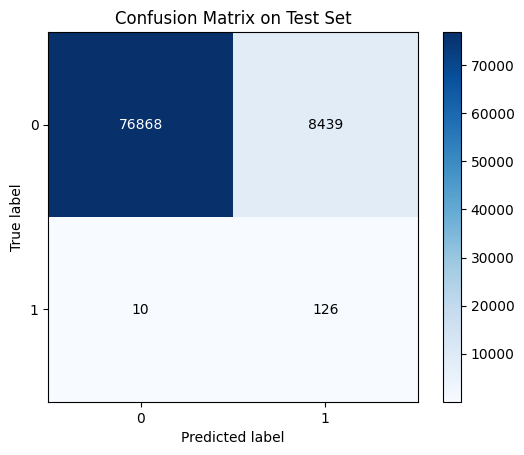

In [ ]:
# Plotting the confusion matrix on the test set
y_preds_ocsvm = model_ocsvm.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, y_preds_ocsvm, normalize=False, title="Confusion Matrix on Test Set")
plt.show()

(iv) XGBoost

In [ ]:
# Prediction labels for the training set
y_train_pred_xgb = model_xgb.predict(X_train)

In [ ]:
y_train_proba_xgb = model_xgb.predict_proba(X_train)[:, 1]  # Probabilities for the positive class

# AUC ROC for training data
auc_train = roc_auc_score(y_train, y_train_proba_xgb)
print(f"AUC ROC on Training Data: {auc_train:.4f}")

AUC ROC on Training Data: 0.9993


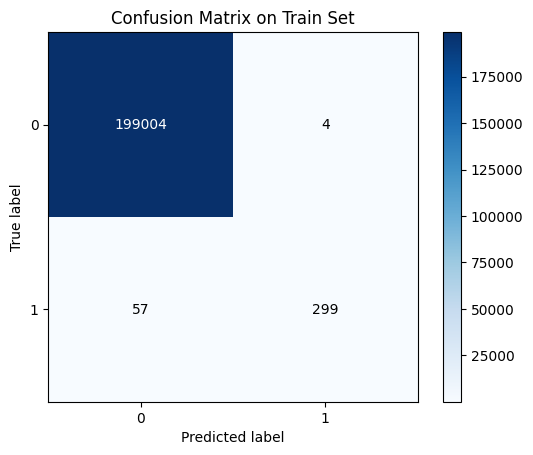

In [ ]:
skplt.metrics.plot_confusion_matrix(y_train, y_train_pred_xgb, normalize=False, title="Confusion Matrix on Train Set")
plt.show()

Evaluation on Test Data

In [ ]:
# Prediction labels for the test set
y_test_pred_xgb = model_xgb.predict(X_test)

In [ ]:
y_test_proba_xgb = model_xgb.predict_proba(X_test)[:, 1]

# AUC ROC for test data
auc_test = roc_auc_score(y_test, y_test_proba_xgb)
print(f"AUC ROC on Test Data: {auc_test:.4f}")

AUC ROC on Test Data: 0.9853


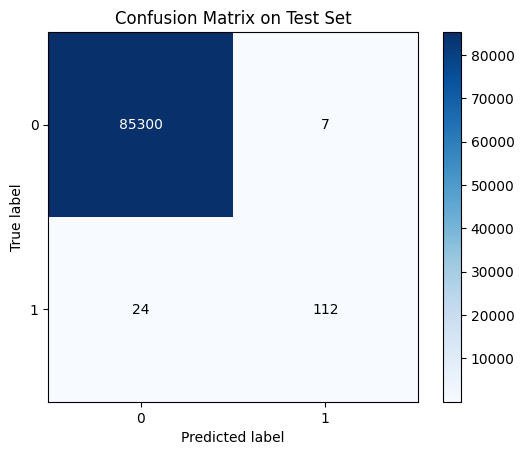

In [ ]:
# Confusion Matrix for Test Data
skplt.metrics.plot_confusion_matrix(y_test, y_test_pred_xgb, normalize=False, title="Confusion Matrix on Test Set")
plt.show()

##10. Model Comparison

In [ ]:
# Calculating ROC curve and ROC AUC for Isolation Forest
fpr_iF, tpr_iF, _ = roc_curve(y_test, y_test_scores_iF)
roc_auc_iF = auc(fpr_iF, tpr_iF)

In [ ]:
# Calculating ROC curve and ROC AUC for Local Outlier Factor
fpr_lof, tpr_lof, _ = roc_curve(y_test, y_test_scores_lof)
roc_auc_lof = auc(fpr_lof, tpr_lof)

In [ ]:
# Calculating ROC curve and ROC AUC for One-Class SVM
fpr_ocsvm, tpr_ocsvm, _ = roc_curve(y_test, y_test_scores_ocsvm)
roc_auc_ocsvm = auc(fpr_ocsvm, tpr_ocsvm)

In [ ]:
# Calculating ROC Curve and ROC AUC for XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_test_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

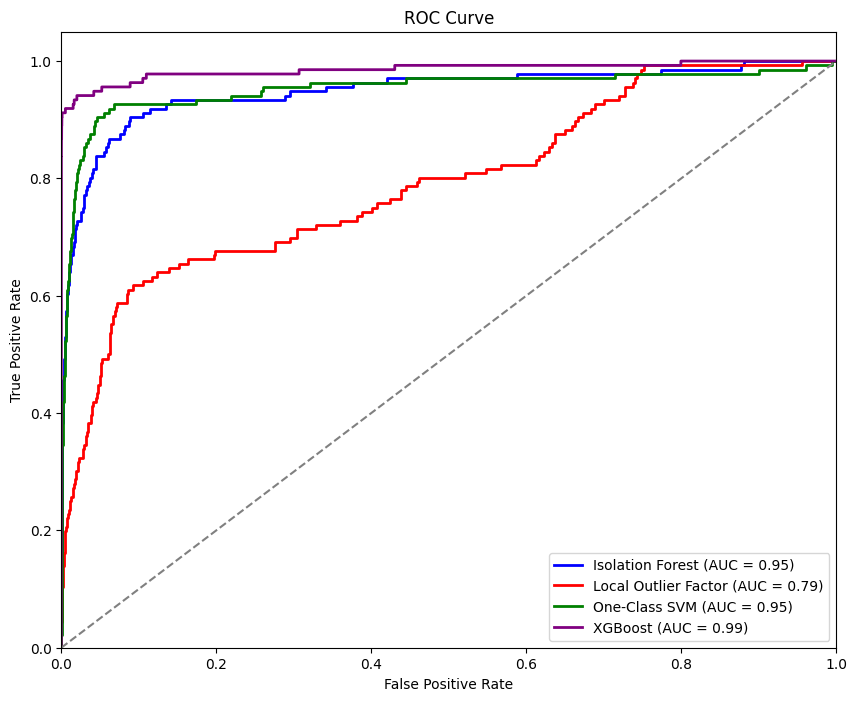

In [ ]:
# Plotting ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_iF, tpr_iF, color='blue', lw=2, label=f'Isolation Forest (AUC = {roc_auc_iF:.2f})')
plt.plot(fpr_lof, tpr_lof, color='red', lw=2, label=f'Local Outlier Factor (AUC = {roc_auc_lof:.2f})')
plt.plot(fpr_ocsvm, tpr_ocsvm, color='green', lw=2, label=f'One-Class SVM (AUC = {roc_auc_ocsvm:.2f})')
plt.plot(fpr_xgb, tpr_xgb, color='purple', lw=2, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Conclusion:

In our Project, XGBoost Model is Performing better when compared to Isolation Forest, Local Outlier Factor and One-Class SVM Models

##In this Projct, we have built Machine Learning Models such as "Isolation Forest", "Local Outlier Factor", "One-Class SVM" (Using PyOD Library) and "XGBoost" to detection fraudulent activities in Credit Card Transactions